**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля
-4 балла после 06:00 10 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

##### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -0.5 баллов
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata, fetch_openml
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from scipy.spatial import distance_matrix
%load_ext pycodestyle_magic

In [3]:


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.leaf_size = 30

    def fit(self, X, y):
        self._y = y
        self.classes = np.unique(y)
        if self.algorithm == 'brute':
            self._fit_X = X
        elif self.algorithm == 'kd_tree':
            self._tree = KDTree(X, leaf_size=self.leaf_size)
        return self

    def predict(self, X):
        n_neighbors = self.n_neighbors
        _y = self._y
        if self.algorithm == 'brute':
            _fit_X = self._fit_X
            distances = distance_matrix(X, _fit_X)
        elif self.algorithm == 'kd_tree':
            distances, ind = self._tree.query(X, n_neighbors)
        args = np.argsort(distances)[:, :n_neighbors]
        k_neighbors = _y[args]
        classes, count = np.unique(k_neighbors, return_counts=True, axis=1)
        return classes[:, np.argmax(count, axis=-1)]

    def predict_proba(self, X):
        n_neighbors = self.n_neighbors
        _y = self._y
        n_samples = X.shape[0]
        n_classes = self.classes
        if self.algorithm == 'brute':
            _fit_X = self._fit_X
            distances = distance_matrix(X, _fit_X)
        elif self.algorithm == 'kd_tree':
            distances, _ = self._tree.query(X, n_neighbors)

        args = np.argsort(distances)[:, :n_neighbors]
        k_neighbors = _y[args]
        classes, count = np.unique(k_neighbors, return_counts=True, axis=1)
        res = np.zeros((n_samples, self.classes.shape[0]))
        for i in range(n_samples):
            for k, k_class in enumerate(n_classes):
                res[i, k] += np.sum(k_neighbors[i] == k_class)
        res /= self.n_neighbors

        return res

    def score(self, X, y):
        predicted = self.predict(X)
        return np.mean(predicted == y)


**IRIS**

In [4]:
iris = datasets.load_iris()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [6]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [7]:
%time clf.fit(X_train, y_train)

CPU times: user 1.33 ms, sys: 1 ms, total: 2.33 ms
Wall time: 1.69 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [8]:
%time my_clf.fit(X_train, y_train)

CPU times: user 27 µs, sys: 20 µs, total: 47 µs
Wall time: 48.6 µs


MyKNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [9]:
%time clf.predict(X_test)

CPU times: user 3.35 ms, sys: 17 µs, total: 3.37 ms
Wall time: 2.29 ms


array([1, 0, 2, 0, 0, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1])

In [10]:
%time my_clf.predict(X_test)

CPU times: user 1.69 ms, sys: 260 µs, total: 1.95 ms
Wall time: 1.08 ms


array([1, 0, 2, 0, 0, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1])

In [11]:
%time clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 1.14 ms, total: 1.14 ms
Wall time: 756 µs


array([[0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.5, 0.5]])

In [12]:
%time my_clf.predict_proba(X_test)

CPU times: user 994 µs, sys: 727 µs, total: 1.72 ms
Wall time: 1.04 ms


array([[0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.5, 0.5]])

In [13]:
clf.score(X_test, y_test)

0.9333333333333333

In [14]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

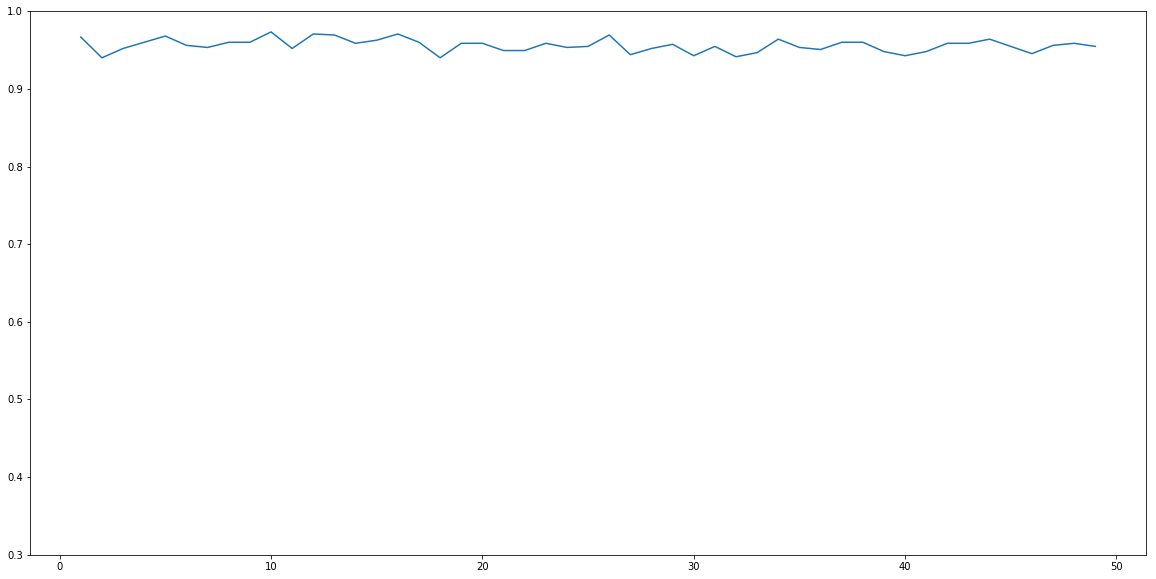

10


In [15]:


iris = datasets.load_iris()
loops = 50
max_neighbors = 50
min_neighbors = 1
scores = np.zeros((max_neighbors))

for i in range(min_neighbors, max_neighbors):
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute')
    for j in range(loops):
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
        my_clf.fit(X_train, y_train)
        scores[i] += my_clf.score(X_test, y_test)
    scores[i] /= loops
    
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111)
ax1.set_ylim(0.3, 1)
plt.plot(np.arange(min_neighbors, max_neighbors), scores[min_neighbors:])
plt.show()

print(np.argmax(scores))

**MNIST**

In [16]:
mnist = fetch_openml('mnist_784')
#mnist = fetch_mldata('MNIST original')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 58 ms, sys: 207 µs, total: 58.2 ms
Wall time: 57.6 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 2.63 ms, sys: 362 µs, total: 2.99 ms
Wall time: 2.04 ms


MyKNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [20]:
%time clf.predict(X_test)

CPU times: user 6.83 s, sys: 1.61 s, total: 8.44 s
Wall time: 1.6 s


array([8, 0, 7, 3, 2, 3, 4, 3, 3, 7, 5, 9, 6, 4, 3, 3, 7, 2, 6, 6, 0, 4,
       6, 3, 1, 5, 6, 4, 1, 5, 0, 9, 9, 9, 1, 9, 8, 0, 4, 1, 8, 2, 1, 0,
       8, 5, 2, 2, 1, 5, 8, 2, 5, 6, 0, 9, 1, 8, 6, 7, 2, 5, 7, 6, 5, 7,
       1, 9, 2, 6, 5, 1, 8, 1, 1, 5, 3, 9, 4, 8, 9, 1, 1, 8, 7, 2, 2, 5,
       6, 2, 3, 0, 1, 0, 2, 0, 3, 7, 1, 4, 7, 3, 1, 7, 7, 1, 4, 6, 1, 5,
       6, 7, 9, 5, 9, 0, 2, 0, 4, 1, 7, 7, 9, 4, 5, 7, 5, 3, 5, 9, 5, 0,
       9, 5, 4, 0, 8, 5, 1, 2, 1, 6, 3, 6, 5, 9, 8, 5, 1, 1, 9, 9, 7, 2,
       9, 2, 3, 7, 3, 7, 9, 1, 2, 2, 0, 1, 5, 3, 2, 3, 8, 2, 5, 7, 8, 7,
       9, 1, 4, 6, 9, 3, 4, 4, 5, 7, 6, 8, 8, 8, 2, 5, 0, 0, 5, 1, 0, 4,
       4, 3, 1, 0, 1, 2, 9, 4, 8, 5, 3, 7, 4, 3, 7, 0, 7, 5, 7, 4, 1, 1,
       6, 0, 3, 9, 7, 9, 7, 5, 4, 7, 1, 8, 2, 5, 1, 4, 2, 0, 3, 2, 2, 3,
       2, 1, 7, 7, 2, 8, 5, 6, 6, 9, 2, 4, 2, 3, 4, 3, 0, 8, 0, 1, 4, 1,
       8, 1, 3, 4, 5, 7, 6, 0, 2, 2, 4, 3, 4, 6, 1, 0, 6, 0, 4, 4, 4, 0,
       6, 9, 5, 7, 5, 1, 2, 9, 6, 8, 2, 5, 3, 2, 6,

In [21]:
%time my_clf.predict(X_test)

CPU times: user 2min 12s, sys: 2min 21s, total: 4min 33s
Wall time: 4min 33s


array([8, 0, 7, 3, 2, 3, 4, 3, 3, 7, 5, 9, 6, 4, 3, 3, 7, 2, 6, 6, 0, 4,
       6, 3, 1, 5, 6, 4, 1, 5, 0, 9, 9, 9, 1, 9, 8, 0, 4, 1, 8, 2, 1, 0,
       8, 5, 2, 2, 1, 5, 8, 2, 5, 6, 0, 9, 1, 8, 6, 7, 2, 5, 7, 6, 5, 7,
       1, 9, 2, 6, 5, 1, 8, 1, 1, 5, 3, 9, 4, 8, 9, 1, 1, 8, 7, 2, 2, 5,
       6, 2, 3, 0, 1, 0, 2, 0, 3, 7, 1, 4, 7, 3, 1, 7, 7, 1, 4, 6, 1, 5,
       6, 7, 9, 5, 9, 0, 2, 0, 4, 1, 7, 7, 9, 4, 5, 7, 5, 3, 5, 9, 5, 0,
       9, 5, 4, 0, 8, 5, 1, 2, 1, 6, 3, 6, 5, 9, 8, 5, 1, 1, 9, 9, 7, 2,
       9, 2, 3, 7, 3, 7, 9, 1, 2, 2, 0, 1, 5, 5, 2, 3, 8, 2, 6, 7, 8, 7,
       9, 1, 4, 6, 9, 3, 4, 4, 5, 7, 6, 8, 8, 8, 2, 5, 0, 0, 5, 1, 0, 4,
       4, 3, 1, 0, 1, 2, 9, 4, 8, 5, 3, 7, 4, 3, 7, 0, 7, 5, 9, 4, 1, 1,
       6, 0, 3, 9, 7, 9, 7, 5, 4, 7, 1, 8, 2, 5, 1, 4, 2, 0, 3, 2, 2, 3,
       7, 1, 7, 7, 2, 8, 5, 6, 6, 9, 2, 4, 2, 3, 4, 3, 0, 8, 0, 1, 4, 1,
       8, 1, 3, 4, 5, 7, 6, 0, 2, 2, 4, 3, 4, 6, 1, 0, 6, 0, 4, 4, 4, 0,
       6, 9, 5, 7, 5, 1, 2, 9, 6, 8, 2, 5, 3, 2, 6,

In [22]:
%time clf.predict_proba(X_test)

CPU times: user 6.65 s, sys: 1.75 s, total: 8.4 s
Wall time: 1.6 s


array([[0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0.5, 0. , 0.5, ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 1. , 0. , 0. ]])

In [23]:
%time my_clf.predict_proba(X_test)

CPU times: user 4min 18s, sys: 4min 46s, total: 9min 4s
Wall time: 9min 5s


array([[0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0.5, 0. , 0.5, ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 1. , 0. , 0. ]])

In [24]:
clf.score(X_test, y_test)

0.9642857142857143

In [25]:
my_clf.score(X_test, y_test)

0.97

Задание 4

In [18]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [21]:
%time clf.fit(X_train, y_train)

CPU times: user 17.9 s, sys: 24 ms, total: 17.9 s
Wall time: 17.9 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [22]:
%time my_clf.fit(X_train, y_train)

CPU times: user 18.3 s, sys: 84.7 ms, total: 18.4 s
Wall time: 18.4 s


MyKNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [23]:
%time clf.predict(X_test)

CPU times: user 58.2 s, sys: 0 ns, total: 58.2 s
Wall time: 58.2 s


array([2, 4, 7, 8, 3, 3, 1, 3, 0, 9, 9, 4, 8, 8, 5, 4, 7, 1, 1, 5, 6, 6,
       7, 9, 6, 4, 6, 1, 1, 3, 4, 5, 3, 1, 6, 6, 0, 0, 8, 3, 2, 8, 5, 7,
       6, 2, 2, 3, 7, 9, 1, 9, 1, 0, 6, 5, 8, 6, 7, 8, 7, 9, 1, 4, 5, 1,
       2, 0, 1, 9, 8, 9, 7, 4, 4, 5, 9, 8, 2, 2, 4, 3, 9, 4, 5, 5, 6, 2,
       3, 2, 3, 8, 9, 5, 6, 5, 0, 6, 4, 8, 3, 3, 7, 1, 5, 1, 4, 2, 4, 9,
       2, 8, 1, 8, 0, 4, 6, 2, 8, 1, 7, 9, 1, 7, 8, 0, 2, 2, 2, 9, 4, 6,
       1, 2, 2, 5, 1, 4, 6, 4, 3, 7, 2, 2, 2, 3, 7, 4, 4, 1, 8, 9, 6, 7,
       4, 7, 5, 3, 1, 5, 0, 8, 0, 3, 4, 9, 4, 4, 0, 6, 2, 1, 9, 0, 1, 7,
       2, 2, 6, 7, 4, 6, 7, 8, 8, 9, 4, 6, 4, 2, 4, 0, 7, 3, 7, 8, 1, 0,
       5, 7, 3, 4, 2, 1, 3, 9, 3, 0, 9, 0, 1, 3, 8, 1, 0, 3, 6, 6, 0, 4,
       4, 3, 7, 8, 1, 2, 9, 9, 3, 8, 1, 8, 3, 0, 7, 8, 1, 8, 6, 2, 5, 0,
       5, 3, 1, 3, 8, 5, 9, 9, 8, 5, 4, 1, 4, 6, 8, 2, 7, 4, 7, 8, 3, 8,
       1, 6, 0, 1, 3, 1, 8, 6, 6, 7, 3, 0, 1, 2, 0, 1, 6, 7, 2, 7, 2, 6,
       1, 4, 7, 3, 9, 3, 9, 1, 6, 9, 5, 0, 5, 3, 5,

In [24]:
%time my_clf.predict(X_test)

CPU times: user 58.6 s, sys: 0 ns, total: 58.6 s
Wall time: 58.7 s


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [25]:
%time clf.predict_proba(X_test)

CPU times: user 57.8 s, sys: 0 ns, total: 57.8 s
Wall time: 57.8 s


array([[0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0.5, 0. , 0.5],
       ...,
       [0.5, 0. , 0.5, ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [26]:
%time my_clf.predict_proba(X_test)

CPU times: user 59.1 s, sys: 2.16 ms, total: 59.1 s
Wall time: 59.2 s


array([[0.5, 0.5, 0. , ..., 0. , 0. , 0. ],
       [0.5, 0.5, 0. , ..., 0. , 0. , 0. ],
       [0.5, 0.5, 0. , ..., 0. , 0. , 0. ],
       ...,
       [0.5, 0.5, 0. , ..., 0. , 0. , 0. ],
       [0.5, 0.5, 0. , ..., 0. , 0. , 0. ],
       [0.5, 0.5, 0. , ..., 0. , 0. , 0. ]])

In [27]:
clf.score(X_test, y_test)

0.9714285714285714

In [28]:
my_clf.score(X_test, y_test)

KeyboardInterrupt: 

Задание 5

In [ ]:
# seaborn - визализация данных(основан на matplotlib)
# matplotlib - создание графиков(визуализация данных)
# train_test_split - разделение данных на обучающую часть и тесты
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) конвейер преобразований оканчивающийся оценочной функцией
# StandardScaler (from sklearn.preprocessing import StandardScaler) - предобработка данных, сдвигая их 
# на средние значение и масштабирование (деление на дисперсию)
# ClassifierMixin - общий класс для всех классификаторов
# NeighborsBase - базовый класс для всех KNN
# KNeighborsMixin - базовый класс для поиска K соседей
# SupervisedIntegerMixin - класс для проверки типа входных данных и последующему обучению им модели